# Cluster Analysis

## Dimension Reduction

### Load Dataset

In [1]:
import pandas as pd

data = pd.read_csv("content/processed_data/preprocessed_dataset.csv")

data.head(10)

,FOKSZAM,NAPLOSZ,PARTNERKOD,FIZMOD,OSSZEG,DEVNEM,ELLENSZAMLA,KTGHKOD,AFA_KOD,NAPLO_JELLEG,CEGKOD,PENZMOZGAS,IRANY_CF,HONAP,NAP
0,122,101,0,0,4.063576,0,272,0,0,0,0,1,0,1,1
1,491,101,0,0,-58.496764,0,6,0,0,0,0,1,0,1,1
2,491,101,0,0,-7.868419,0,25,0,0,0,0,1,0,1,1
3,161,101,0,0,4.063576,0,272,0,0,0,0,1,0,1,1
4,3614,101,0,0,0.031845,0,272,0,0,0,0,1,0,1,1
5,491,101,0,0,0.021079,0,54,0,0,0,0,1,0,1,1
6,36411,101,0,0,0.052437,0,272,0,0,0,0,1,0,1,1
7,491,101,0,0,0.000487,0,60,0,0,0,0,1,0,1,1
8,364111,101,0,0,0.026998,0,272,0,0,0,0,1,0,1,1
9,491,101,0,0,0.025926,0,62,0,0,0,0,1,0,1,1


In [2]:
data.shape

(31019, 15)

In [3]:
# Make OSSZEG abosulte

# data["OSSZEG"] = abs(data["OSSZEG"])

In [2]:
# Set Target and leave out from dataset

target = "FOKSZAM"

data.drop([target], inplace=True, axis="columns")

## TSNE 2D

In [13]:
# Dimension reduction to 2 dimensions
from sklearn.manifold import TSNE

tsne_2d = TSNE(
    n_components=2,
    perplexity=30,
    random_state=42,
    n_iter=300).fit_transform(data)

data_2d = pd.DataFrame(tsne_2d, columns=["feature1", "feature2"])

data_2d.head(10)

,feature1,feature2
0,3.571069,-10.588879
1,-7.397375,-12.785400
2,-7.713826,-12.611989
3,3.571069,-10.588879
4,3.619400,-10.757894
5,-5.298810,-12.757788
6,3.620538,-10.757493
7,-5.019810,-12.542137
8,3.619352,-10.757933
9,-4.955893,-12.487782


C:\Users\Attila\AppData\Local\Temp\ipykernel_13096\1245895314.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


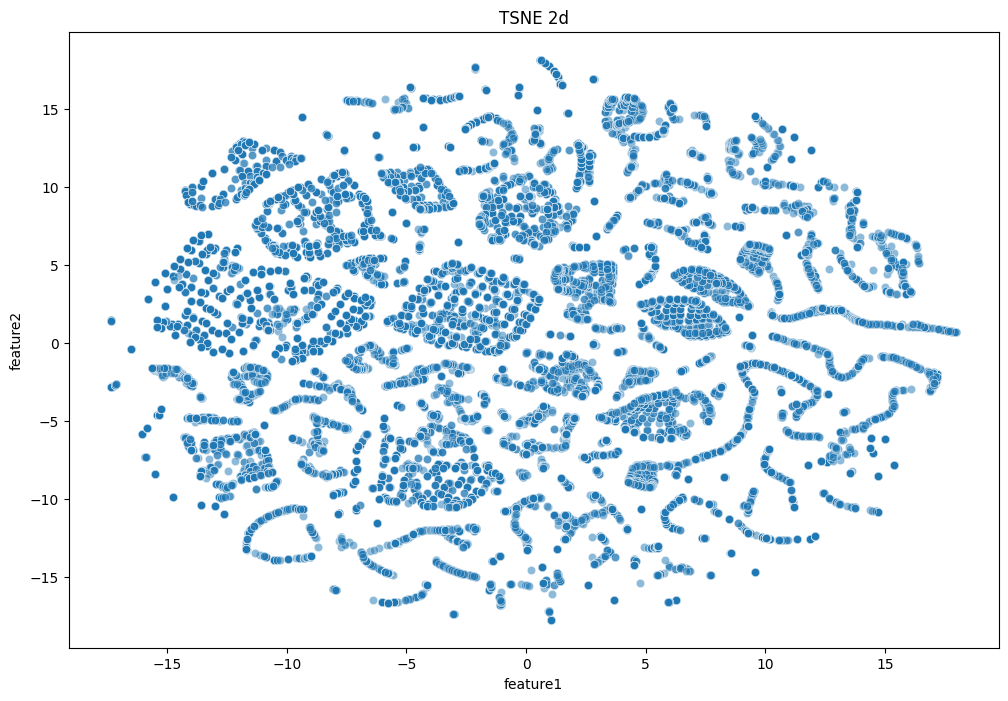

In [14]:
# Visualize data

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="feature1",
    y="feature2",
    data=data_2d,
    palette=sns.color_palette("hls", 2),
    alpha=0.5
).set(title="TSNE 2d")

plt.savefig(f"content/clustering/TSNE_2d.pdf") 

## PCA

In [15]:
# 2D PCA data
from sklearn.decomposition import PCA

pca_obj = PCA(n_components=2)
data_pca_2d = pd.DataFrame(pca_obj.fit_transform(data), columns=["PCA1", "PCA2"])

data_pca_2d.head()

,PCA1,PCA2
0,-72.334662,-170.606595
1,-106.808432,-204.675591
2,-104.345377,-202.233831
3,-72.334662,-170.606595
4,-72.334718,-170.607316


In [16]:
# 6D PCA data
from sklearn.decomposition import PCA

pca_obj = PCA(n_components=6)
data_pca_6d = pd.DataFrame(pca_obj.fit_transform(data))

data_pca_6d.head()

,0,1,2,3,4,5
0,-72.334662,-170.606595,-125.368540,-3.217939,-3.245185,1.452948
1,-106.808432,-204.675591,136.179596,-4.544131,-3.130695,1.675225
2,-104.345377,-202.233831,117.496145,-4.064784,-3.245567,1.567773
3,-72.334662,-170.606595,-125.368540,-3.217939,-3.245185,1.452948
4,-72.334718,-170.607316,-125.368414,-3.251533,-3.235866,1.460947


C:\Users\Attila\AppData\Local\Temp\ipykernel_13096\3207091754.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


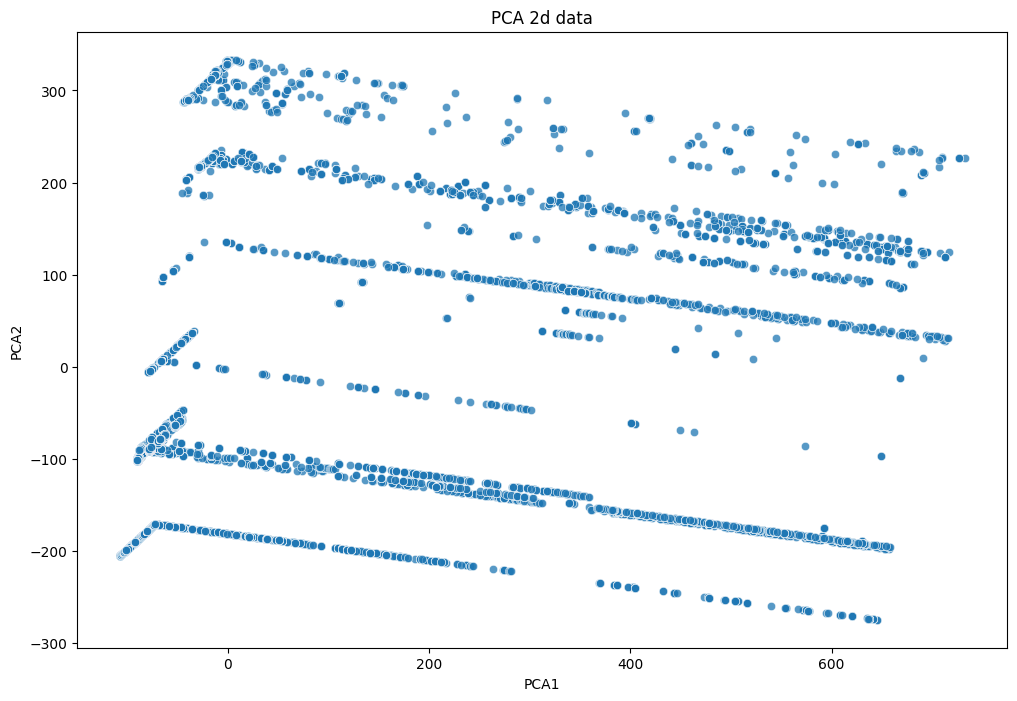

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    data=data_pca_2d,    
    palette=sns.color_palette("hls", 1),
    alpha=0.75
).set(title="PCA 2d data")

plt.savefig(f"content/clustering/PCA_2d.pdf") 

## Kernel PCA

In [56]:
"""
from sklearn.decomposition import KernelPCA

kernel_pca = KernelPCA(n_components=9, kernel="cosine", fit_inverse_transform=False)
data_kernel_pca = kernel_pca.fit_transform(data)
data_kernel_pca = pd.DataFrame(data_kernel_pca)

data_kernel_pca.head()
"""

'\nfrom sklearn.decomposition import KernelPCA\n\nkernel_pca = KernelPCA(n_components=9, kernel="cosine", fit_inverse_transform=False)\ndata_kernel_pca = kernel_pca.fit_transform(data)\ndata_kernel_pca = pd.DataFrame(data_kernel_pca)\n\ndata_kernel_pca.head()\n'

## K-Means Clustering

### Elbow Diagram

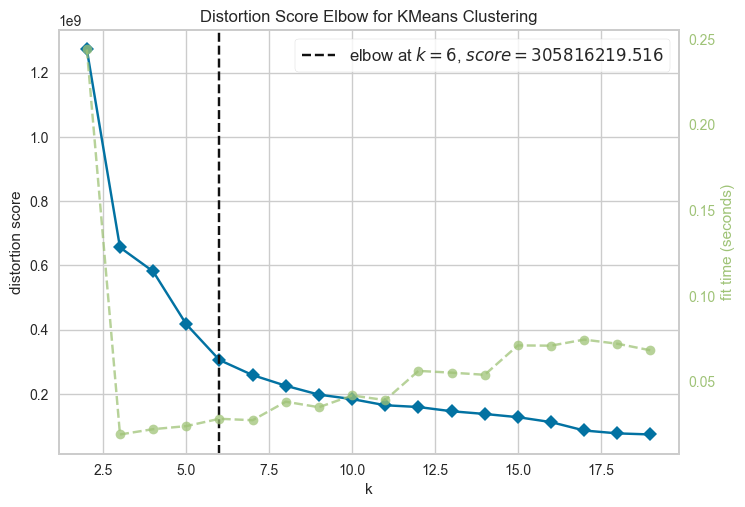

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2, 20))

visualizer.fit(data)
visualizer.show()

### Number of Clusters

In [9]:
k = 20

### K-Means with PCA

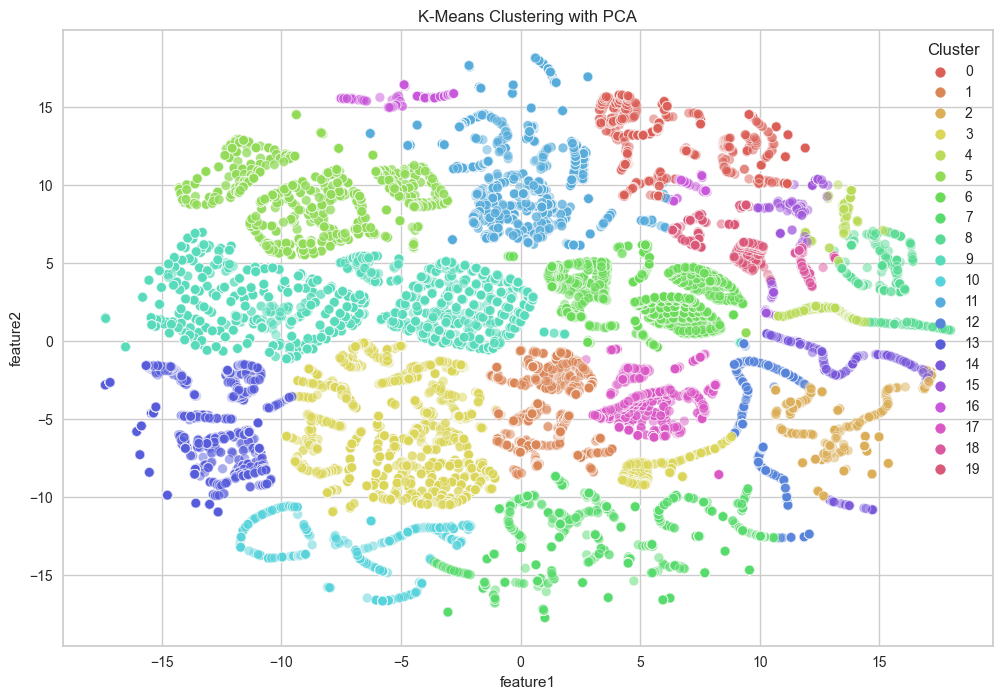

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, random_state=42).fit(data_pca_6d)
labels = kmeans.labels_

data_kmeans = pd.DataFrame(data_2d)
data_kmeans["Cluster"] = pd.DataFrame(labels)

data_kmeans.head(10)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="feature1",
    y="feature2",
    data=data_kmeans,
    hue=data_kmeans["Cluster"],
    palette=sns.color_palette("hls", k),
    alpha=0.5
).set(title="K-Means Clustering with PCA")

plt.savefig(f"content/clustering/K_Means_PCA.pdf") 

In [15]:
# Silhoutte score
from sklearn.metrics import silhouette_score

score = silhouette_score(data_pca_6d, labels, metric="euclidean")
print("Silhouttte score: %.3f" % score)

Silhouttte score: 0.703


In [16]:
# Davies-Bouldin Index

from sklearn.metrics import davies_bouldin_score

score = davies_bouldin_score(data_pca_6d, labels)
print("Davies-Bouldin score: %.3f" % score)

Davies-Bouldin score: 0.632


### K-Means with Original Dataset

NameError: name 'silhouette_score' is not defined

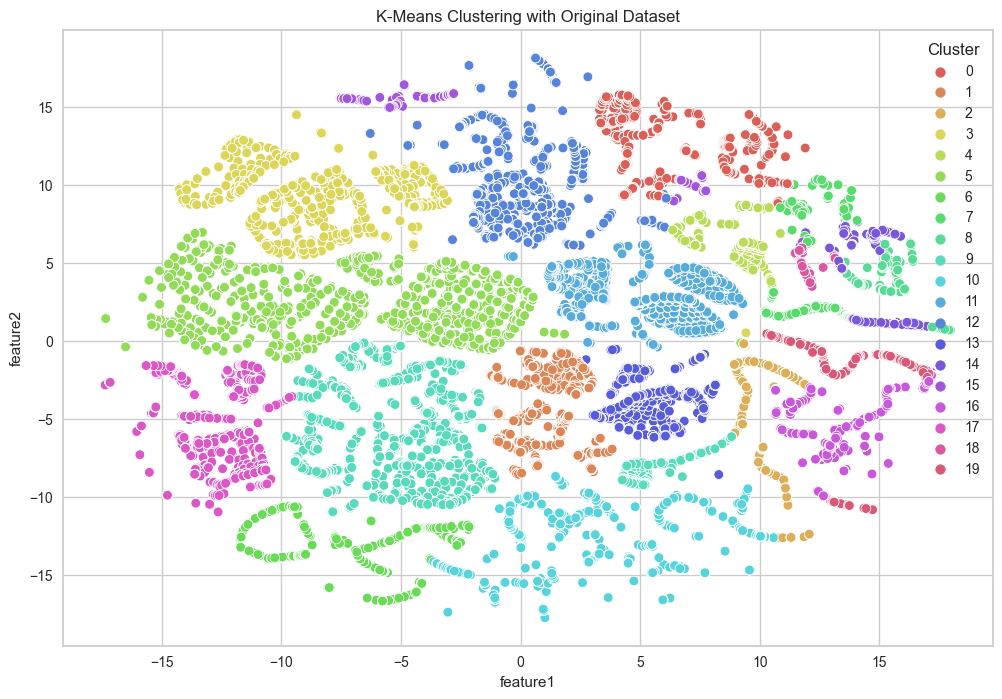

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
labels = kmeans.labels_

data_kmeans = pd.DataFrame(data_2d)
data_kmeans["Cluster"] = pd.DataFrame(labels)

data_kmeans.head(10)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="feature1",
    y="feature2",
    data=data_kmeans,
    hue=data_kmeans["Cluster"],
    palette=sns.color_palette("hls", k),
    alpha=1
).set(title="K-Means Clustering with Original Dataset")

plt.savefig(f"content/clustering/K_Means_Original_Dataset.pdf") 

score = silhouette_score(data, labels, metric="euclidean")
print("Silhouttte score: %.3f" % score)

score = davies_bouldin_score(data, labels)
print("Davies-Bouldin score: %.3f" % score)

## TSNE 3D

In [63]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne_3d = TSNE(n_components=3,
               perplexity=30,
               random_state=42,
               n_iter=300).fit_transform(data)

labels = kmeans.labels_

data_tsne_3d = pd.DataFrame(tsne_3d, columns=["feature1", "feature2", "feature3"])

data_tsne_3d["Cluster"] = pd.DataFrame(labels)

fig = px.scatter_3d(
    data_tsne_3d,
    x="feature1",
    y="feature2",
    z="feature3",
    color="Cluster",
    title="TSNE 3d Clustering",
    color_continuous_scale=px.colors.qualitative.Pastel,
    size_max=1
)

fig.show()

KeyboardInterrupt: 

## Spectral Clustering

In [18]:
from sklearn.cluster import SpectralClustering

clusters = 10

clustering_Spectral = SpectralClustering(n_clusters=clusters, affinity="rbf", n_init=10).fit(data)
spectral_labels = clustering_Spectral.labels_
data_spectral = pd.DataFrame(tsne_2d, columns=["TSNE1", "TSNE2"])
data_spectral["Cluster"] = pd.DataFrame(spectral_labels)

data_spectral.head(10)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="TSNE1",
    y="TSNE2",
    data=data_spectral,
    hue=data_spectral["Cluster"],
    palette=sns.color_palette("hls", clusters),
    alpha=0.75
).set(title="Spectral Clustering - Kernel PCA")

plt.savefig(f"content/clustering/spectral_clustering_kernel.pdf") 

## DB Scan

      TSNE1      TSNE2  Cluster
0  3.571069 -10.588879        0
1 -7.397375 -12.785400       -1
2 -7.713826 -12.611989        1
3  3.571069 -10.588879        0
4  3.619400 -10.757894        0


C:\Users\Attila\AppData\Local\Temp\ipykernel_13096\605443085.py:13: UserWarning: 
The palette list has fewer values (6) than needed (33) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


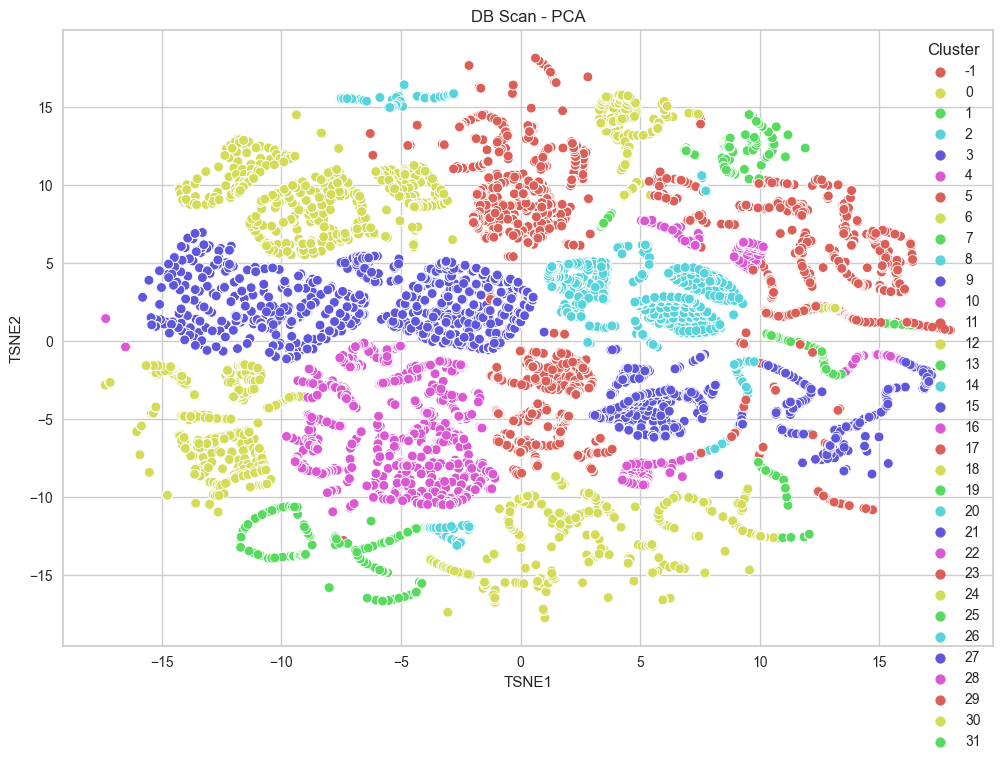

In [24]:
# DBScan -> Can extract the number of clusters
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=15, min_samples=50).fit(data_pca_6d)
dbscan_labels = dbscan.labels_

data_dbscan = pd.DataFrame(tsne_2d, columns=["TSNE1", "TSNE2"])
data_dbscan["Cluster"] = pd.DataFrame(dbscan_labels)

print(data_dbscan.head())

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="TSNE1",
    y="TSNE2",
    data=data_dbscan,
    hue=data_dbscan["Cluster"],
    palette=sns.color_palette("hls", 6),
    alpha=1
).set(title="DB Scan - PCA")

plt.savefig(f"content/clustering/DB_Scan_PCA.pdf")

## Gaussian Mixture

       TSNE1      TSNE2  Cluster
0 -11.087217  -2.027783        4
1 -14.543650  -2.888528        0
2 -14.333315  -2.584714        0
3 -11.065480  -2.036071        4
4   1.303126  11.988905        4


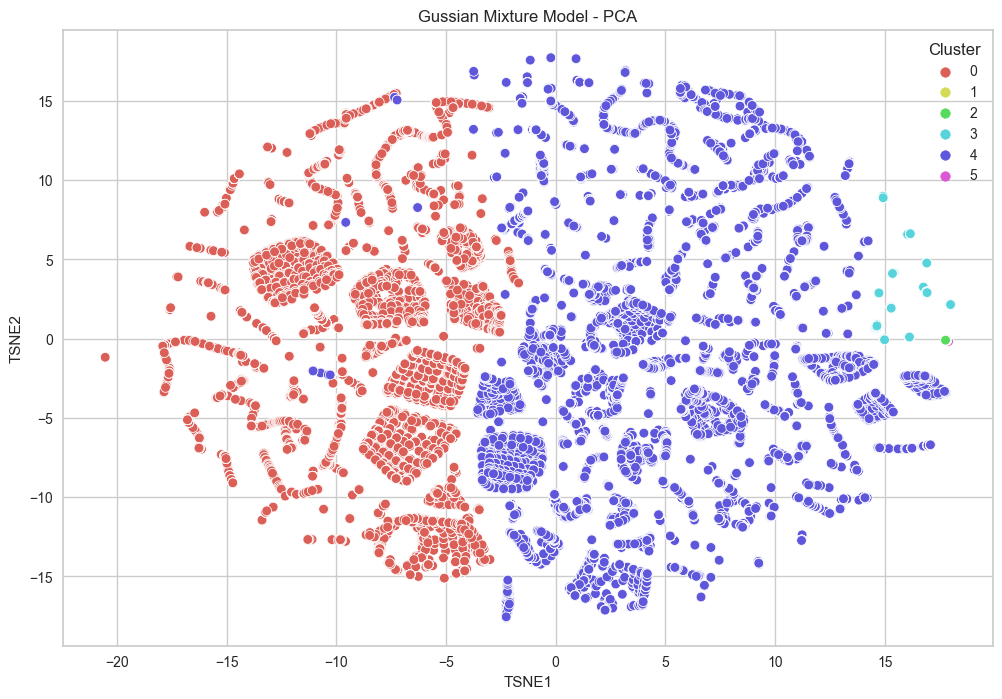

In [66]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=k).fit(data_pca_2d)
gmm_labels = gmm.predict(data_pca_2d)

embedding_df_gmm = pd.DataFrame(tsne_2d, columns=["TSNE1", "TSNE2"])
embedding_df_gmm["Cluster"] = pd.DataFrame(gmm_labels)

print(embedding_df_gmm.head())

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="TSNE1",
    y="TSNE2",
    data=embedding_df_gmm,
    hue=embedding_df_gmm["Cluster"],
    palette=sns.color_palette("hls", k),
    alpha=1
).set(title="Gussian Mixture Model - PCA")

plt.savefig(f"content/clustering/gaussian_Mix_PCA.pdf")

## Results

In [25]:
# Use -> K-Menas with 6D PCA data and 20 clusters

from sklearn.cluster import KMeans

# Reload dataset to roll-back any changes made during cluster analysis
data = pd.read_csv("content/processed_data/preprocessed_dataset.csv")

kmeans = KMeans(n_clusters=k, random_state=42).fit(data_pca_6d)
labels = kmeans.labels_

data["Cluster"] = pd.DataFrame(labels)

data.head(10)

,FOKSZAM,NAPLOSZ,PARTNERKOD,FIZMOD,OSSZEG,DEVNEM,ELLENSZAMLA,KTGHKOD,AFA_KOD,NAPLO_JELLEG,CEGKOD,PENZMOZGAS,IRANY_CF,HONAP,NAP,Cluster
0,122,101,0,0,4.063576,0,272,0,0,0,0,1,0,1,1,7
1,491,101,0,0,-58.496764,0,6,0,0,0,0,1,0,1,1,10
2,491,101,0,0,-7.868419,0,25,0,0,0,0,1,0,1,1,10
3,161,101,0,0,4.063576,0,272,0,0,0,0,1,0,1,1,7
4,3614,101,0,0,0.031845,0,272,0,0,0,0,1,0,1,1,7
5,491,101,0,0,0.021079,0,54,0,0,0,0,1,0,1,1,10
6,36411,101,0,0,0.052437,0,272,0,0,0,0,1,0,1,1,7
7,491,101,0,0,0.000487,0,60,0,0,0,0,1,0,1,1,10
8,364111,101,0,0,0.026998,0,272,0,0,0,0,1,0,1,1,7
9,491,101,0,0,0.025926,0,62,0,0,0,0,1,0,1,1,10


## Save Data with Cluster information

In [26]:
# Exporting preprocessed DataFrame to CSV
data.to_csv("content/processed_data/preprocessed_dataset_with_clusters.csv", index=False)